In [10]:
import os
import torch
import data
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import torch.nn as nn


In [11]:

save_dir = './checkpoints/'
data_dir ='./dataset/'
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
model = torch.load(os.path.join(save_dir, 'best_model_{}.pt'.format('A')))
modules = list(model.children())[:-1]
model_modify = nn.Sequential(*modules).to(device)

num_classes = 10
input_size = 224
batch_size = 300
outputs_list = []
labels_list = []
train_loader, valid_loader = data.load_data(data_dir=data_dir,input_size=input_size, batch_size=batch_size)
for inputs, labels in train_loader:
    outputs_list.append(model_modify(inputs.to(device)))
    labels_list.append(labels)
outputs = torch.cat(outputs_list,dim=0)
labels = torch.cat(labels_list,dim=0)
outputs = outputs.squeeze().cpu().detach()

tsne = TSNE(n_components=2,init = 'pca')
X_tsne = tsne.fit_transform(outputs)

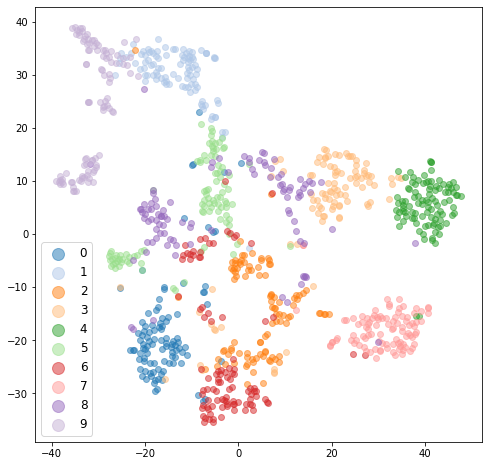

In [13]:
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(8,8))
for lab in range(num_classes):
    indices =labels==lab
    ax.scatter(X_tsne[indices,0],X_tsne[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=0.5)
ax.legend(fontsize='large', markerscale=2)
plt.savefig('tsne.png')
